[12657.000743881606, 12657.587858145585, 12658.066107987408, 12658.540950020595, 12658.991954941353, 12659.572372889854, 12660.105927160705, 12660.509161461312, 12660.943745821769, 12661.352830933829, 12661.86301866084, 12662.322219424273, 12662.867773330821, 12663.401719683068, 12663.865377363749, 12664.41128427597, 12665.009329191724, 12665.47011987028, 12666.053718077774, 12666.653202287598, 12667.157407385246, 12667.595963962522, 12668.063496625762, 12668.567038077812, 12668.980337388657, 12669.429667856042, 12669.84362940687, 12670.253313811918, 12670.829276981358, 12671.23789045838, 12671.707165042259, 12672.247316813467, 12672.750036527972, 12673.266711052327, 12673.688868488232, 12674.269356240711, 12674.736773818015, 12675.304830692914, 12675.888258713487, 12676.29933708987, 12676.757521871206, 12677.209627930153, 12677.719446902403, 12678.226489716568, 12678.729490177497, 12679.174440652054, 12679.717432041372, 12680.175319775666, 12680.719845095757, 12681.278079285945, 12681

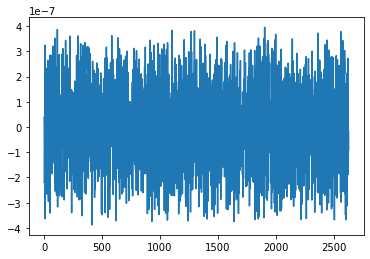

In [1]:
from airplane import Airplane
from receiver import Receiver

airplane1 = Airplane('782034',[108.128234,33.2141348,10000],[110.86143245,34.750012,10000],180,0)
receiver1 = Receiver([108.7187911987,34.0290298462,435],dirfting=-500,NoiseRange=(-300,0))
receiver2 = Receiver([108.7135726929,34.0363121033,427],dirfting=500,NoiseRange=(0,300))
receiver3 = Receiver([118.56588,34.448925,500])
time_track1 =receiver1.fin_time_track(airplane1)
time_track2 =receiver2.fin_time_track(airplane1)
time_track3 =receiver3.fin_time_track(airplane1)
track1 = airplane1.track

# 经纬度数据归一化

In [3]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sc = MinMaxScaler(feature_range=(-1,1))


# train_set_array = np.array(train_set)
# train_norm = sc.fit_transform(train_set_array.reshape(-1,1))


lng = []
lat = []
alt = []

for position in track1:
    lng.append(position[0])
    lat.append(position[1])
    alt.append(position[2])

lng_array = np.array(lng)
lng_norm = sc.fit_transform(lng_array.reshape(-1,1))
print(lng_norm)

lat_array = np.array(lat)
lat_norm = sc.fit_transform(lat_array.reshape(-1,1))

alt_array = np.array(alt)
alt_norm = sc.fit_transform(alt_array.reshape(-1,1))

track_norm = [] #归一化轨迹列表
for i in range(len(lng_norm)):
    track_norm.append([lng_norm[i][0], lat_norm[i][0], alt_norm[i][0]])


    
    

[[-1.        ]
 [-0.99943712]
 [-0.99887425]
 ...
 [ 0.998559  ]
 [ 0.9992795 ]
 [ 1.        ]]


In [4]:
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt,pi, atan

# using_data = time_track1
# test_data = []#前后两两时间差

# for i in range(len(using_data)-1):
#     test_data.append(using_data[i+1]-using_data[i]-airplane1.geodistance(track1[i+1],receiver1.location)*10/3)


# plt.plot(using_data[:-1], test_data)
# plt.show()

# receiver1.plt_location(airplane1)

In [5]:
# len(using_data)

track_norm=track_norm[:4000]
test_size = 25
train_set = track_norm[: -test_size]
test_set = track_norm[-test_size:]

print(train_set)
print(test_set)

train_norm = torch.Tensor(track_norm).cuda()

[[-1.0, -1.0, -1.0], [-0.9994371227257659, -0.999063462417908, -0.9979576144215088], [-0.9988742454515318, -0.9981271195480517, -0.9959162722105503], [-0.9983113681773119, -0.9971909713904452, -0.9938759733671034], [-0.9977484909030778, -0.9962550179450744, -0.9918367178911893], [-0.9971856136288437, -0.9953192592119322, -0.9897985057827796], [-0.9966227363546238, -0.9943836951910612, -0.9877613370418956], [-0.9960598590803897, -0.9934483258824116, -0.9857252116685373], [-0.9954969818061556, -0.9925131512859906, -0.9836901296626976], [-0.9949341045319215, -0.9915781714018266, -0.9816560910243766], [-0.9943712272577017, -0.9906433862299195, -0.979623095753567], [-0.9938083499834676, -0.9897087957702126, -0.9775911438502902], [-0.9932454727092335, -0.9887744000227698, -0.9755602353145392], [-0.9926825954350136, -0.9878401989875698, -0.9735303701462925], [-0.9921197181607795, -0.9869061926646268, -0.9715015483455787], [-0.9915568408865454, -0.9859723810538839, -0.9694737699123834], [-0.99

In [6]:
def input_data(seq,ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i : i+ws]
        label = seq[i+ws : i+ws+1]
        out.append((window,label))

    return out



window_size = 25
train_data = input_data(train_norm, window_size)
# print(train_data)
print(len(train_data))
print(train_data[0])

3417
(tensor([[-1.0000, -1.0000, -1.0000],
        [-0.9994, -0.9991, -0.9980],
        [-0.9989, -0.9981, -0.9959],
        [-0.9983, -0.9972, -0.9939],
        [-0.9977, -0.9963, -0.9918],
        [-0.9972, -0.9953, -0.9898],
        [-0.9966, -0.9944, -0.9878],
        [-0.9961, -0.9934, -0.9857],
        [-0.9955, -0.9925, -0.9837],
        [-0.9949, -0.9916, -0.9817],
        [-0.9944, -0.9906, -0.9796],
        [-0.9938, -0.9897, -0.9776],
        [-0.9932, -0.9888, -0.9756],
        [-0.9927, -0.9878, -0.9735],
        [-0.9921, -0.9869, -0.9715],
        [-0.9916, -0.9860, -0.9695],
        [-0.9910, -0.9850, -0.9674],
        [-0.9904, -0.9841, -0.9654],
        [-0.9899, -0.9832, -0.9634],
        [-0.9893, -0.9822, -0.9614],
        [-0.9887, -0.9813, -0.9594],
        [-0.9882, -0.9804, -0.9573],
        [-0.9876, -0.9794, -0.9553],
        [-0.9871, -0.9785, -0.9533],
        [-0.9865, -0.9776, -0.9513]], device='cuda:0'), tensor([[-0.9859, -0.9766, -0.9493]], device='cuda

In [8]:
class LSTM(nn.Module):
    def __init__(self, input_size=3, hidden_size=100,out_size=3):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = ( torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred= self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]


torch.manual_seed(42)
model = LSTM().cuda()
# train_data.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)


print(model)


for p in model.parameters():
    print(p.numel())

LSTM(
  (lstm): LSTM(3, 100)
  (linear): Linear(in_features=100, out_features=3, bias=True)
)
1200
40000
400
400
300
3


In [10]:
epochs = 10

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1, model.hidden_size).cuda(), torch.zeros(1,1, model.hidden_size).cuda())
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    
    
    
    print( f" Epoch {i} Loss:  {loss.item()}")


 Epoch 0 Loss:  0.0004532221064437181
 Epoch 1 Loss:  0.00045619640150107443
 Epoch 2 Loss:  0.00044438379700295627
 Epoch 3 Loss:  0.0004330646770540625
 Epoch 4 Loss:  0.0004223250725772232
 Epoch 5 Loss:  0.0004113171307835728
 Epoch 6 Loss:  0.0004001249617431313
 Epoch 7 Loss:  0.00038889588904567063
 Epoch 8 Loss:  0.0003776777593884617
 Epoch 9 Loss:  0.0003665283729787916


In [43]:
future = 25
preds = train_norm[-window_size:].tolist()

print(preds)
model.eval()

for i in range(future):
    seq = torch.Tensor(preds[-window_size:]).cuda()
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size).cuda(),torch.zeros(1,1,model.hidden_size).cuda())
        preds.append(model(seq).tolist())

# print(preds)

[[-0.6122490167617798, -0.6122490167617798], [-0.6126546263694763, -0.6126546263694763], [-0.6130602359771729, -0.6130602359771729], [-0.6134658455848694, -0.6134658455848694], [-0.6138714551925659, -0.6138714551925659], [-0.6142770051956177, -0.6142770051956177], [-0.6146826148033142, -0.6146826148033142], [-0.6150882244110107, -0.6150882244110107], [-0.6154938340187073, -0.6154938340187073], [-0.615899384021759, -0.615899384021759], [-0.6163049936294556, -0.6163049936294556], [-0.6167106032371521, -0.6167106032371521], [-0.6171162128448486, -0.6171162128448486], [-0.6175218224525452, -0.6175218224525452], [-0.6179273724555969, -0.6179273724555969], [-0.6183329820632935, -0.6183329820632935], [-0.61873859167099, -0.61873859167099], [-0.6191442012786865, -0.6191442012786865], [-0.6195498108863831, -0.6195498108863831], [-0.6199553608894348, -0.6199553608894348], [-0.6203609704971313, -0.6203609704971313], [-0.6207665801048279, -0.6207665801048279], [-0.6211721897125244, -0.621172189712

In [46]:
print(torch.Tensor(preds))
print(torch.Tensor(test_set))

tensor([[-0.6122, -0.6122],
        [-0.6127, -0.6127],
        [-0.6131, -0.6131],
        [-0.6135, -0.6135],
        [-0.6139, -0.6139],
        [-0.6143, -0.6143],
        [-0.6147, -0.6147],
        [-0.6151, -0.6151],
        [-0.6155, -0.6155],
        [-0.6159, -0.6159],
        [-0.6163, -0.6163],
        [-0.6167, -0.6167],
        [-0.6171, -0.6171],
        [-0.6175, -0.6175],
        [-0.6179, -0.6179],
        [-0.6183, -0.6183],
        [-0.6187, -0.6187],
        [-0.6191, -0.6191],
        [-0.6195, -0.6195],
        [-0.6200, -0.6200],
        [-0.6204, -0.6204],
        [-0.6208, -0.6208],
        [-0.6212, -0.6212],
        [-0.6216, -0.6216],
        [-0.6220, -0.6220],
        [-0.6232, -0.6240],
        [-0.6239, -0.6247],
        [-0.6245, -0.6253],
        [-0.6251, -0.6260],
        [-0.6257, -0.6265],
        [-0.6263, -0.6271],
        [-0.6268, -0.6276],
        [-0.6272, -0.6281],
        [-0.6277, -0.6285],
        [-0.6281, -0.6290],
        [-0.6285, -0